Data Science
=====

Johannes Schneider

In [ ]:
#Configure some display stuff - not really needed
#nice defaults for matplotlib
#show plots in the notebook
%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

In [ ]:
#Imports: What functionality do I need?
#General Python libraries
import numpy as np #(fast) numerical computation
import scipy #scientific computations
import pandas as pd #data manipulation
pd.options.mode.chained_assignment = None #get rid of some pandas warnings

#plotting libraries
import matplotlib.pyplot as plt #very flexible plotting, low level, gives you a lot of control
import seaborn #more high-level plotting, builds on top of matplotlib

Data exploration
=== 
Predict Son's Height using Father's Height, but explore first:

1) Look at raw data 

2) Look at summary

In [ ]:
#Read from local harddrive 
#from google.colab import files
#import io
#uploaded = files.upload() #You must select a file, only needed if executed the first time
#fsh = pd.read_csv(io.StringIO(uploaded['Galton.csv'].decode('utf-8')), sep=',')

#Read from your own google drive
from google.colab import drive
drive.mount("/content/gdrive")
fsh = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data Science Class/Data/Galton.csv")

Mounted at /content/gdrive


In [ ]:
#Read data from web
#fsh=pd.read_csv("https://www.dropbox.com/s/1swtp4ovwe0r1df/Galton.csv?dl=1")

#Read from local harddrive 
import os
#print("Current path",os.getcwd()) 
#mpath="C:/Users/jschneid/OneDrive/Lectures/Data Science/Demos/data/" 
#print("Looking for data folder in",mpath)
#fsh=pd.read_csv(mpath+"Galton.csv") #Read data from hard drive

In [ ]:
print("First 5 rows\n----\n",fsh.head(),"\n\nLast 5 rows\n----\n" ,fsh.tail()) #Show first and last 5 rows

First 5 rows
----
   Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4 

Last 5 rows
----
     Family  Father  Mother Gender  Height  Kids
893   136A    68.5    65.0      M    68.5     8
894   136A    68.5    65.0      M    67.7     8
895   136A    68.5    65.0      F    64.0     8
896   136A    68.5    65.0      F    63.5     8
897   136A    68.5    65.0      F    63.0     8


In [ ]:
fsh.describe() #Show summary for numerical attributes

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


In [ ]:
print(fsh.apply(lambda x: [x.unique()])) #show unique values
print() #create an empty line (not very common in notebooks - you would mostly go for a new cell)
fsh.info() #show data types

                                              Family  ...                                     Kids
0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...  ...  [4, 2, 5, 6, 1, 3, 8, 9, 7, 11, 10, 15]

[1 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [ ]:
from collections import Counter
print("Gender",Counter(fsh.Gender))
print("Kids Distribution",Counter(fsh.Kids).most_common(10))

Gender Counter({'M': 465, 'F': 433})
Kids Distribution [(5, 140), (8, 128), (4, 116), (6, 114), (7, 112), (3, 66), (9, 63), (2, 40), (10, 40), (1, 32)]


Pearson Correlation Coefficient: 0.3913173581417897


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Seaborn Plot')

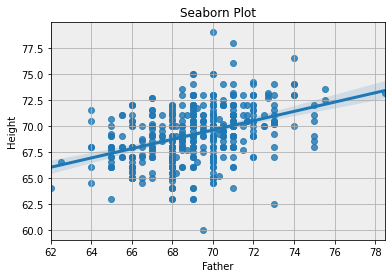

In [ ]:
fsh =fsh[fsh.Gender=="M"] #Keep only males (Remember: We want father-son heights)

print("Pearson Correlation Coefficient:",np.corrcoef(fsh.Father,fsh.Height)[0][1])

#1st plot using seaborn
seaborn.regplot(fsh.Father,fsh.Height) #plot data => #Height is really son's height
plt.title("Seaborn Plot")
#plt.show() This would be needed if we did not have %matplotlib inline initially

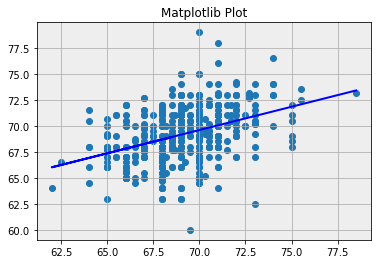

In [ ]:
#2nd plot using matplotlib
fit = np.polyfit(fsh.Father,fsh.Height, deg=1)
plt.plot(fsh.Father, fit[0] * fsh.Father + fit[1], color='blue')
plt.title("Matplotlib Plot")
plt.scatter(fsh.Father,fsh.Height)

The iris dataset
====
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/Iris_sanguinea.JPG" style="width: 20%; height: 20%"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Siberian_Iris_Iris_sibirica_Flower_Petal_Closeup_3008px.jpg" style="width: 20%; height: 20%"/>





In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv") #iris data from file from web
#df=pd.read_csv(mpath+"iris.csv")
print(df.head(),"\n" ,df.tail(),"\n") #Show first and last 5 rows
df.describe() #Show summary

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 
      sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica 



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


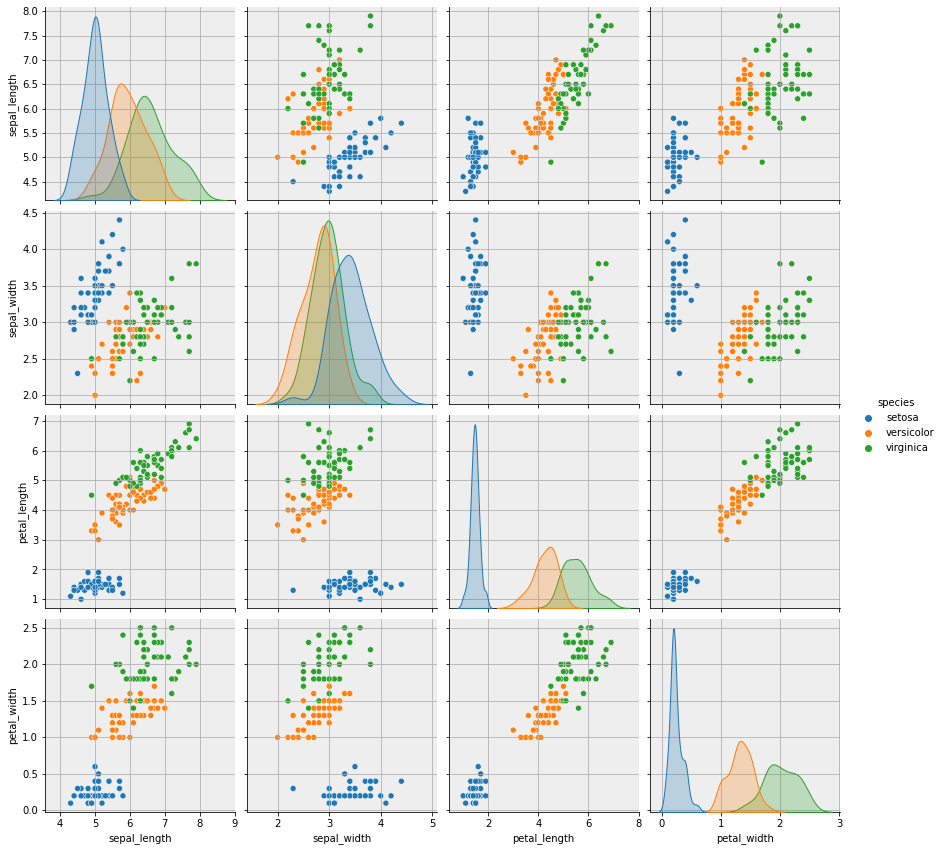

In [ ]:
seaborn.pairplot(df, hue="species", size=3)

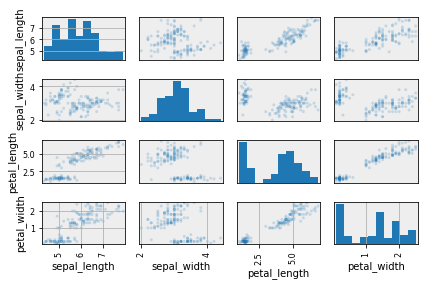

In [ ]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2) #panda plot misses class labels by default
plt.tight_layout()